# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
url


'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=f5112bbe8f644e1aaa40f3fd8ffa48f1'

In [11]:
#making a list 

weather_data=[]

#print data
print("Beginning part of Data")
print("------------")

#setting counters  for data
count=1
re_count=1

#looping all cities
for i, city in enumerate(cities):

    #gorouping 
    if (i % 50 ==0 and i>=50):
        count=0
        re_count+=1

    # creating endpoint
    city_url=url + '&q='+city

    #setting the record
    print('Processing Record' + str(count)+ 'of'+ str(len(cities)) + '|' + city)
    count +=1

    try:
        #retrieving data
        city_weather=requests.get(city_url).json()
        #setting up conditions
        name=(city_weather["name"])
        cloud=(city_weather[("clouds")]["all"])
        country=(city_weather[("sys")]["country"])
        date=(city_weather["dt"])
        humidity=(city_weather["main"]["humidity"])
        latitude=(city_weather["coord"]["lat"])
        longitude=(city_weather["coord"]["lon"])
        maxtemperature=(city_weather["main"]["temp_max"])
        windy=(city_weather["wind"]["speed"])

        weather_data.append({"City":name,
                        "Lat":latitude,
                        "Lng":longitude,
                        "Max Temp":maxtemperature,
                        "Humidity":humidity,
                        "Cloudiness":cloud,
                        "Wind Speed":windy,
                        "Country":country,
                        "Date":date})   
    except KeyError:
        print("Skip!! City was not found")
    pass
print('--------------------------')
print('Completed of Data Retrieval')


Beginning part of Data
------------
Processing Record1of611|sovetskiy
Processing Record2of611|bengkulu
Processing Record3of611|castrovillari
Processing Record4of611|saskylakh
Processing Record5of611|gamboma
Processing Record6of611|kui buri
Processing Record7of611|hobart
Processing Record8of611|saint george
Processing Record9of611|victoria
Processing Record10of611|ushuaia
Processing Record11of611|jamestown
Processing Record12of611|dikson
Processing Record13of611|ahipara
Processing Record14of611|butaritari
Processing Record15of611|bambanglipuro
Processing Record16of611|punta arenas
Processing Record17of611|honningsvag
Processing Record18of611|mullovka
Processing Record19of611|grand gaube
Processing Record20of611|rikitea
Processing Record21of611|oneonta
Processing Record22of611|kofele
Processing Record23of611|illoqqortoormiut
Skip!! City was not found
Processing Record24of611|nanortalik
Processing Record25of611|kavaratti
Processing Record26of611|deputatskiy
Processing Record27of611|avarua

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df=pd.DataFrame(weather_data)
weather_df.to_csv("WeatherPy.csv",encoding="utf-8", index=False)

weather_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sovetskiy,61.3614,63.5842,1.08,87,96,1.66,RU,1679765556
1,Bengkulu,-3.8004,102.2655,25.13,89,100,2.04,ID,1679765557
2,Castrovillari,39.8203,16.2123,9.68,78,1,3.41,IT,1679765558
3,Saskylakh,71.9167,114.0833,-16.26,92,98,4.37,RU,1679765558
4,Gamboma,-1.8764,15.8644,22.93,93,97,0.95,CG,1679765559


In [15]:
test=weather_df["Humidity"].describe()
test

count    557.000000
mean      72.438061
std       21.149992
min        5.000000
25%       63.000000
50%       77.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#The following steps were skipped because there was no humidity greater than 100%
print("The Humidity was inspected for values higher than 100%. The max value is 100%, therefore no need to remove cities.")
test


The Humidity was inspected for values higher than 100%. The max value is 100%, therefore no need to remove cities.


count    557.000000
mean      72.438061
std       21.149992
min        5.000000
25%       63.000000
50%       77.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

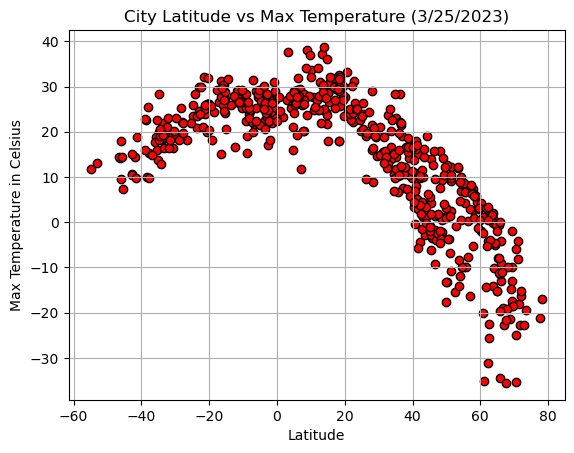

In [31]:
plt.scatter(
    weather_df["Lat"],
    weather_df["Max Temp"],
    marker="o",
    edgecolor="black",
    c="red"
)

#properties 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celsius")
plt.grid(True)
plt.title("City Latitude vs Max Temperature (3/25/2023)")

plt.show()

## Latitude vs. Humidity Plot

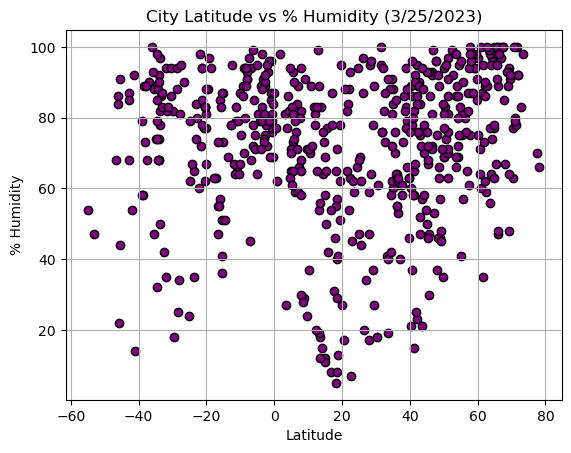

In [34]:
plt.scatter(
    weather_df["Lat"],
    weather_df["Humidity"],
    marker="o",
    edgecolor="black",
    c="purple"
)

#properties 
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.grid(True)
plt.title("City Latitude vs % Humidity (3/25/2023)")

plt.show()

## Latitude vs. Cloudiness Plot

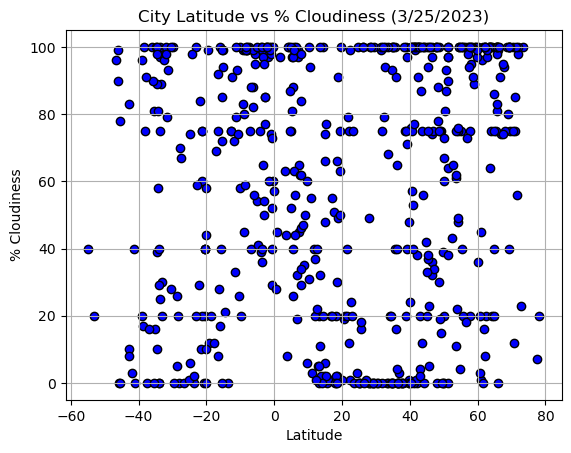

In [35]:
plt.scatter(
    weather_df["Lat"],
    weather_df["Cloudiness"],
    marker="o",
    edgecolor="black",
    c="blue"
)

#properties 
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.grid(True)
plt.title("City Latitude vs % Cloudiness (3/25/2023)")

plt.show()

## Latitude vs. Wind Speed Plot

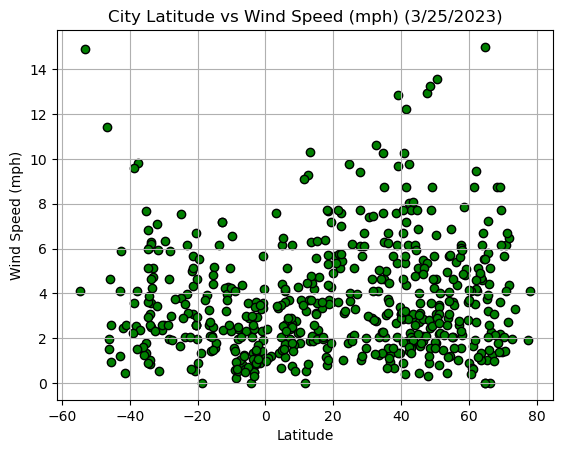

In [36]:
plt.scatter(
    weather_df["Lat"],
    weather_df["Wind Speed"],
    marker="o",
    edgecolor="black",
    c="green"
)

#properties 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.title("City Latitude vs Wind Speed (mph) (3/25/2023)")

plt.show()

## Linear Regression

In [59]:
#define linear regression plot
def plot_regression(x_values, y_values,ylabel,  title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
    reg_val=x_values*slope+intercept
    lin_equation="y="+str(round(slope,1)) +"x +"+ str(round(intercept,1))

    #plotting
    plt.scatter(x_values, y_values)
    plt.plot(x_values, reg_val, "m-")
    plt.annotate(lin_equation,text_coordinates, fontsize=13, color="m")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7663649962925605


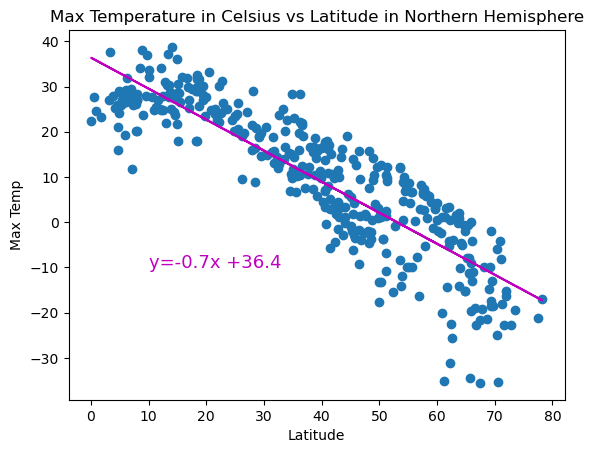

In [61]:
north_hemi=weather_df.loc[(weather_df["Lat"]>=0)]
x_values=north_hemi["Lat"]
y_values=north_hemi["Max Temp"]
plot_regression(x_values, y_values, "Max Temp","Max Temperature in Celsius vs Latitude in Northern Hemisphere", (10,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4322539919393211


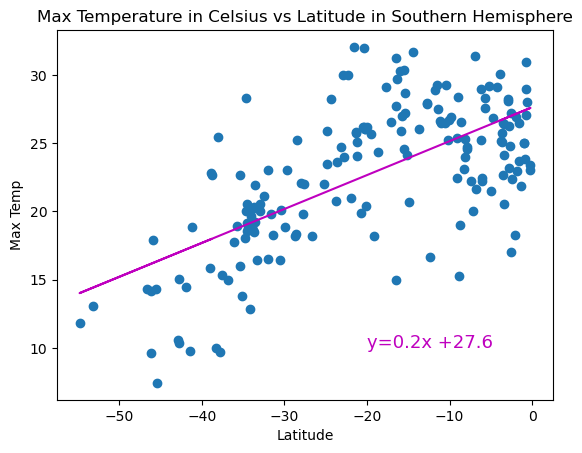

In [66]:
south_hemi=weather_df.loc[(weather_df["Lat"]<0)]
x_values=south_hemi["Lat"]
y_values=south_hemi["Max Temp"]
plot_regression(x_values, y_values, "Max Temp","Max Temperature in Celsius vs Latitude in Southern Hemisphere", (-20,10))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10861087659907037


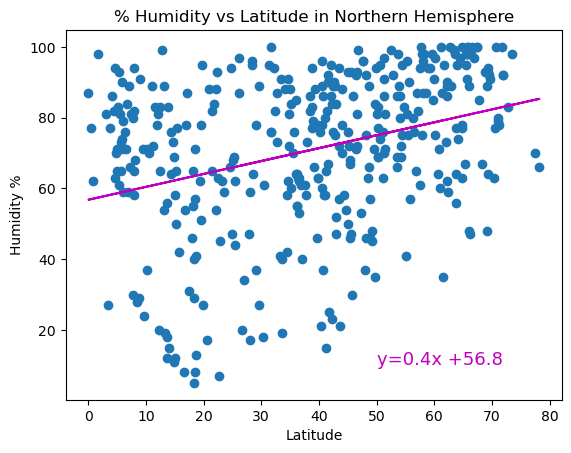

In [65]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Humidity"]
plot_regression(x_values, y_values, "Humidity %","% Humidity vs Latitude in Northern Hemisphere", (50,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.052418858557844526


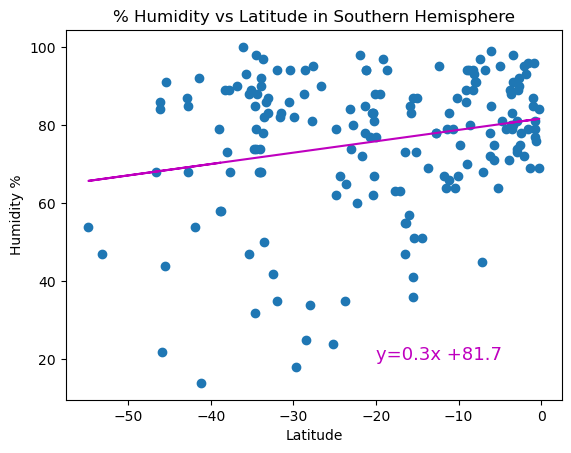

In [68]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Humidity"]
plot_regression(x_values, y_values, "Humidity %","% Humidity vs Latitude in Southern Hemisphere", (-20,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06657605356444292


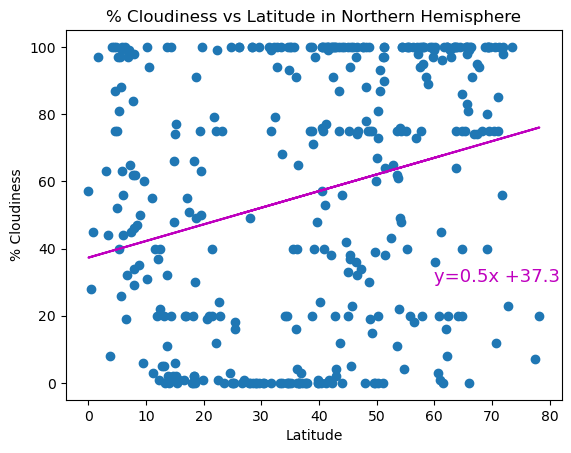

In [71]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Cloudiness"]
plot_regression(x_values, y_values, "% Cloudiness","% Cloudiness vs Latitude in Northern Hemisphere", (60,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08984558023934994


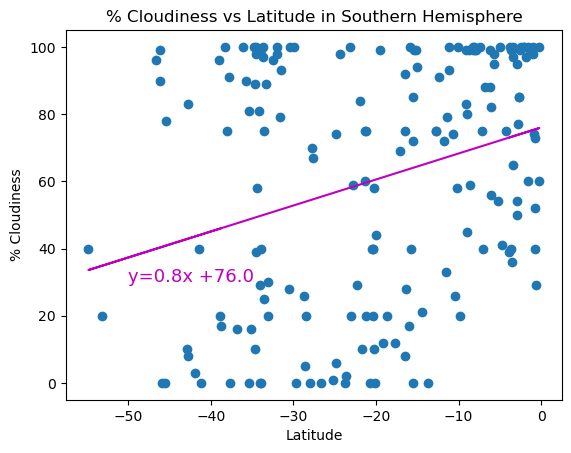

In [72]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Cloudiness"]
plot_regression(x_values, y_values, "% Cloudiness","% Cloudiness vs Latitude in Southern Hemisphere", (-50,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003200209368992346


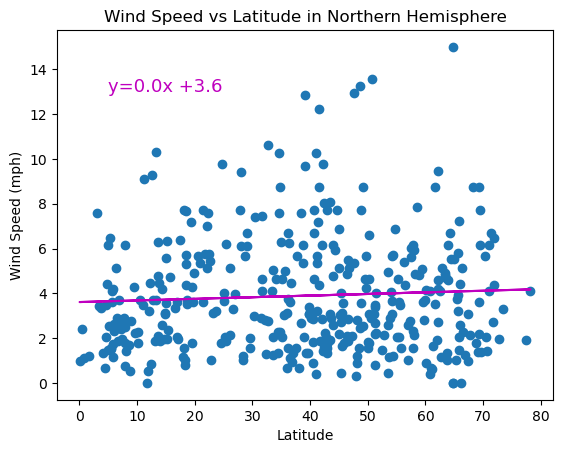

In [74]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Wind Speed"]
plot_regression(x_values, y_values, "Wind Speed (mph)","Wind Speed vs Latitude in Northern Hemisphere", (5,13))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12674663286731613


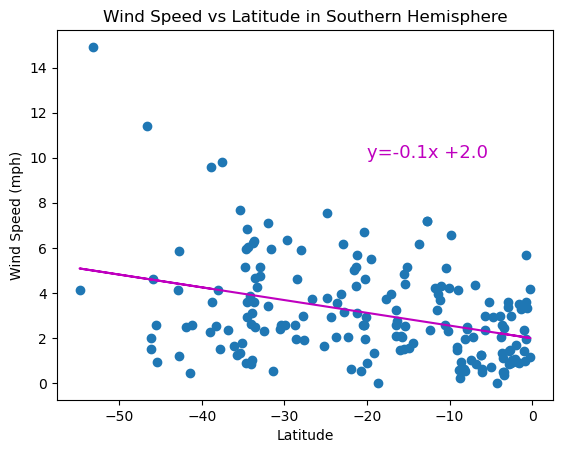

In [76]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Wind Speed"]
plot_regression(x_values, y_values, "Wind Speed (mph)","Wind Speed vs Latitude in Southern Hemisphere", (-20,10))